                             CustomerID                         InteractionID  \
0  2dcb9523-356b-40b2-a67b-1f27797de261  e5d15761-d0a7-4329-89e3-79a892c56097   
1  e12c37b3-7d4d-472f-9fd8-0df2cb3001aa  02f9f376-70ae-4fcd-9070-1db977939948   
2  08a911a3-65e6-4f5d-a6a1-ae7ddcbe28a2  a83fa04c-f109-4f24-8ce1-2078154f6a1c   
3  efdfdfc9-5dbb-4478-911a-101a390a0285  28a69c4b-a2e4-4c74-a130-1132d7733fdf   
4  ca1e90f6-0e5f-492e-ab92-252ff540da18  d9d1c6f8-5e15-4738-b52b-13c2982420cc   

  InteractionDate   Platform InteractionType Sentiment  
0      2023-07-11        NaN         Comment       NaN  
1      2023-07-06    Twitter           Share       NaN  
2      2024-05-24  Instagram         Comment   Neutral  
3      2023-11-01  Instagram            Like   Neutral  
4      2023-07-08  Instagram            Like       NaN  
Missing values per column:
 CustomerID           0
InteractionID        0
InteractionDate      0
Platform           311
InteractionType      0
Sentiment          329
dtype

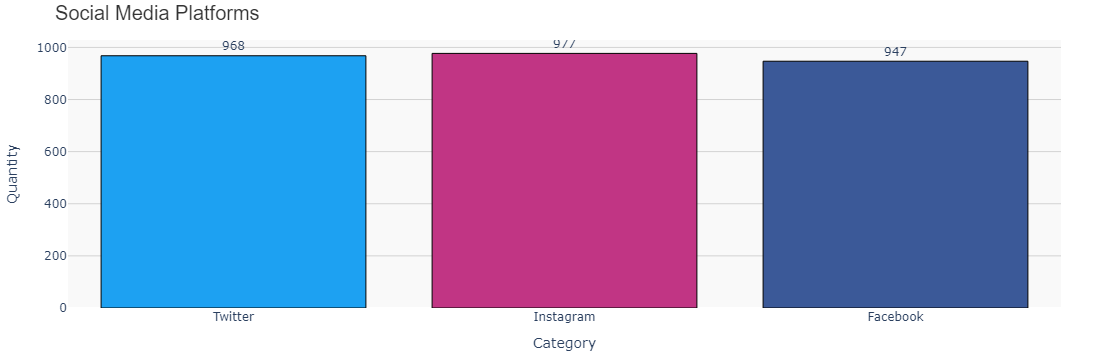

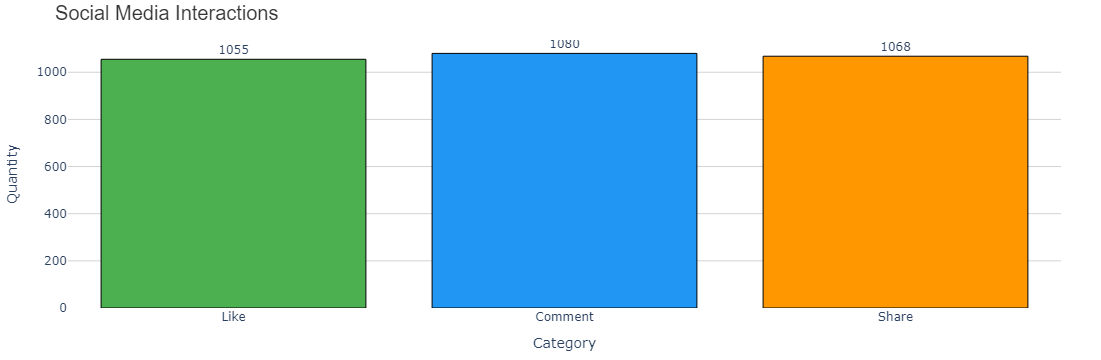

In [3]:
 import pandas as pd
import plotly.express as px

file_path = "C:/Users/User/Downloads/social_media_interactions_contaminated.csv"
data = pd.read_csv(file_path)


print(data.head())


print("Missing values per column:\n", data.isnull().sum())

data.fillna(value=0, inplace=True)


data.drop_duplicates(inplace=True)

print(data.dtypes)  

if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

if 'Interactions' in data.columns:
    Q1 = data['Interactions'].quantile(0.25)
    Q3 = data['Interactions'].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data['Interactions'] >= (Q1 - 1.5 * IQR)) & (data['Interactions'] <= (Q3 + 1.5 * IQR))]


print("Cleaned data:\n", data.head())


data = {
    'Category': ["Twitter", "Instagram", "Facebook"],
    'Quantity': [968, 977, 947]
}

df = pd.DataFrame(data)

fig = px.bar(df, x='Category', y='Quantity', 
             color='Category', 
             color_discrete_sequence=['#1DA1F2', '#C13584', '#3b5998'],  
             title="Social Media Platforms",
             labels={'Quantity': 'Quantity', 'Category': 'Category'},
             text='Quantity')  


fig.update_traces(texttemplate='%{text}', textposition='outside', 
                  marker=dict(line=dict(color='black', width=1)))  

fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Quantity",
    plot_bgcolor='#f9f9f9',  
    title_font=dict(size=20, family='Arial', color='#333'),  
    xaxis=dict(tickangle=0, title_font=dict(size=14), tickfont=dict(size=12)),  
    yaxis=dict(title_font=dict(size=14), tickfont=dict(size=12), gridcolor='lightgray'),  
    margin=dict(l=40, r=40, t=40, b=40),  
    showlegend=False  
)


fig.show()


data = {
    'Category': ["Like", "Comment", "Share"],
    'Quantity': [1055, 1080, 1068]
}


df = pd.DataFrame(data)
fig = px.bar(df, x='Category', y='Quantity', 
             color='Category', 
             color_discrete_sequence=['#4CAF50', '#2196F3', '#FF9800'],  
             title="Social Media Interactions",
             labels={'Quantity': 'Quantity', 'Category': 'Category'},
             text='Quantity')  


fig.update_traces(texttemplate='%{text}', textposition='outside', 
                  marker=dict(line=dict(color='black', width=1)))  

fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Quantity",
    plot_bgcolor='#ffffff', 
    title_font=dict(size=20, family='Arial', color='#333'),
    xaxis=dict(tickangle=0, title_font=dict(size=14), tickfont=dict(size=12)),  
    yaxis=dict(title_font=dict(size=14), tickfont=dict(size=12), gridcolor='lightgray'),  
    margin=dict(l=40, r=40, t=40, b=40),  
    showlegend=False
)

fig.show()

Initial data:
                              CustomerID                         TransactionID  \
0  60567026-f719-4cd6-849e-137e86d8938f  5ff75116-0a50-4d04-80fb-31e5ccbb0769   
1  4090ba85-b111-4f75-a792-c777965f5255  2c39b9fe-ff57-4d39-9321-9f5cdf187aa1   
2  9223891b-73ff-4d5c-b8ae-13ece82ee28b  f79588dd-3db9-4ffa-97f8-7de0e64259f1   
3  9243eebc-938f-480c-8564-16d503d250de  401c0fc9-60df-4455-ad78-67c132f9897d   
4  6e3e8eb8-bc0f-4ffe-9f74-5d5efec9502f  2034aebc-8280-4254-a667-92bcd1c2be4f   

  TransactionDate  Amount  ProductCategory  PaymentMethod  
0      2024-05-15  117.64         Clothing         PayPal  
1      2023-04-26  466.14  Health & Beauty  Bank Transfer  
2      2022-09-23  563.99         Clothing     Debit Card  
3      2024-04-15  254.44       Automotive         PayPal  
4      2024-06-03  590.52    Home & Garden  Bank Transfer  

Missing values per column:
 CustomerID           0
TransactionID        0
TransactionDate      0
Amount             304
ProductCategory  

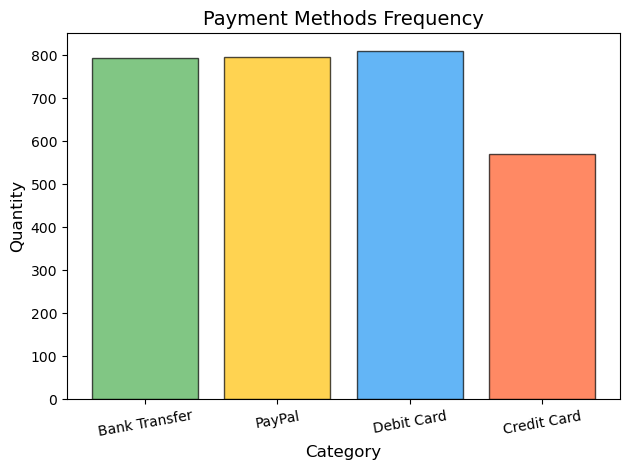

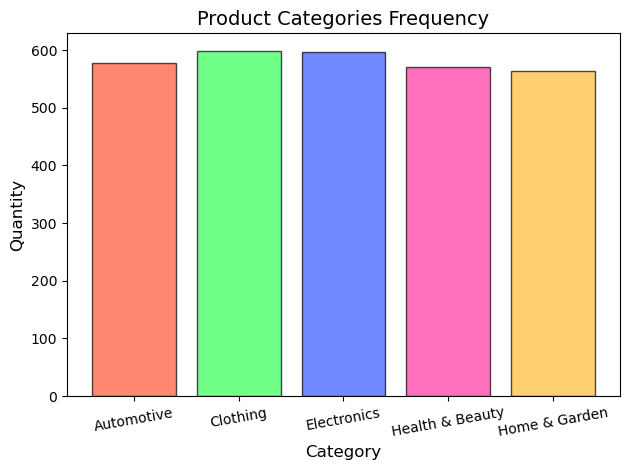

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:/Users/User/Downloads/customer_transactions_contaminated.csv"
data = pd.read_csv(file_path)


print("Initial data:\n", data.head())

print("\nMissing values per column:\n", data.isnull().sum())
data.fillna(value=0, inplace=True)
data.drop_duplicates(inplace=True)
print("\nData types:\n", data.dtypes)

print("\nCleaned data:\n", data.head())

categories = ["Bank Transfer", "PayPal", "Debit Card", "Credit Card"]
heights = [794, 795, 810, 571]


colors = ['#4CAF50', '#FFC107', '#2196F3', '#FF5722']  


plt.bar(categories, heights, color=colors, edgecolor='black', alpha=0.7)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.title("Payment Methods Frequency", fontsize=14)
plt.xticks(rotation=10)  
plt.tight_layout()  
plt.show()

categories = ["Automotive", "Clothing", "Electronics", "Health & Beauty", "Home & Garden"]
heights = [577, 599, 596, 571, 563]


colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#FFBD33']  


plt.bar(categories, heights, color=colors, edgecolor='black', alpha=0.7)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.title("Product Categories Frequency", fontsize=14)
plt.xticks(rotation=10)  
plt.tight_layout() 
plt.show() 

Initial data:
                              CustomerID   Age  Gender           Location  \
0  9207fa75-5758-48d1-94ad-19c041e0520f  51.0  Female         Jensenberg   
1  5fb09cd8-a473-46f7-80bd-6e49cf509078   NaN  Female       Castilloport   
2  c139496e-cc89-498a-bd90-1fb4627b6cff  37.0    Male  Lake Jennifertown   
3  50118139-7264-428f-81cc-a25fddc5d6dd  44.0    Male          Port Carl   
4  7d1f2bbc-8d16-4fbc-9b37-ece3324e8ed4  50.0  Female          Jessebury   

  IncomeLevel  SignupDate  
0         Low  2022-11-17  
1        High  2020-07-21  
2         NaN  2021-01-01  
3      Medium  2024-06-10  
4        High  2023-08-24  

Missing values per column:
 CustomerID       0
Age            291
Gender           0
Location         0
IncomeLevel    303
SignupDate       0
dtype: int64

Data types:
 CustomerID     object
Age            object
Gender         object
Location       object
IncomeLevel    object
SignupDate     object
dtype: object


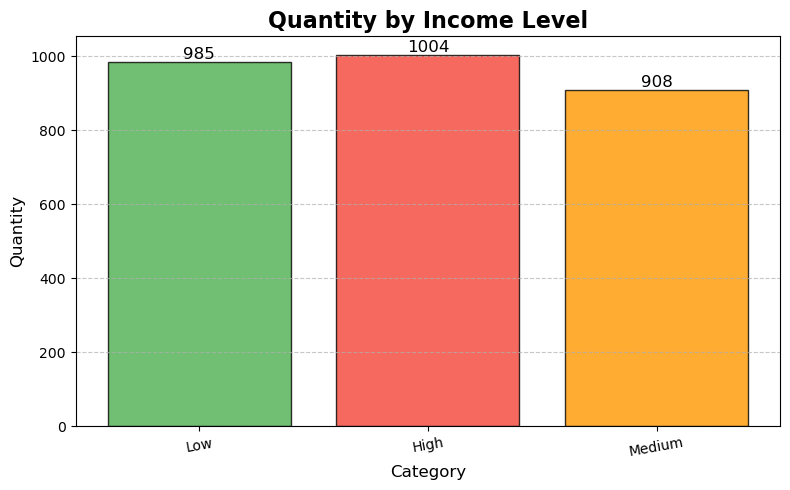

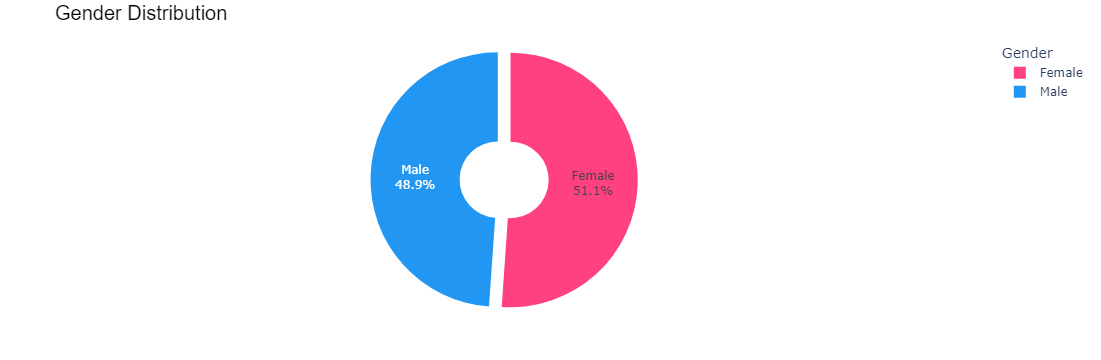

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

file_path = "C:/Users/User/Downloads/customer_demographics_contaminated.csv"
data = pd.read_csv(file_path)


print("Initial data:\n", data.head())


print("\nMissing values per column:\n", data.isnull().sum())

data.fillna(value=0, inplace=True)


data.drop_duplicates(inplace=True)


print("\nData types:\n", data.dtypes)



categories = ["Low", "High", "Medium"]
heights = [985, 1004, 908]
colors = ['#4CAF50', '#F44336', '#FF9800']  
plt.figure(figsize=(8, 5))  
bars = plt.bar(categories, heights, color=colors, edgecolor='black', alpha=0.8)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontsize=12)


plt.xlabel("Category", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.title("Quantity by Income Level", fontsize=16, fontweight='bold')
plt.xticks(rotation=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  


plt.tight_layout() 
plt.show()

data = {
    'Gender': ["Male", "Female"],
    'Count': [445, 465]
}

df = pd.DataFrame(data)
fig = px.pie(df, values='Count', names='Gender', 
             color='Gender', 
             color_discrete_sequence=['#2196F3', '#FF4081'], 
             title="Gender Distribution",
             hole=0.3, 
             template="plotly_white")  

fig.update_traces(textinfo='percent+label', pull=[0.1, 0]) 
fig.update_layout(
    title_font=dict(size=20, family='Arial', color='black'),  
    legend_title_text='Gender', 
    margin=dict(l=40, r=40, t=40, b=40)  
)

fig.show() 